In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Input

In [2]:
input_df = pd.read_csv("merchants_cleaned.csv")

input_df.shape

stripped_url = input_df['website'].apply(lambda x: str(x).replace(" ", ""))

stripped_url

stripped_name = input_df['merchant_name'].apply(lambda x: str(x).replace(" ", ""))

stripped_name

input_df['website'] = stripped_url
input_df['merchant_name'] = stripped_name

input_df.to_csv("merchants_cleaned_stripped.csv")

## Results All

In [3]:
all_df = pd.concat([pd.read_csv("results_all.csv"), pd.read_csv("results_all_2.csv")])

In [4]:
all_df = all_df.iloc[:,1:]

In [5]:
all_df.shape

(456, 13)

In [6]:
all_df

,merchant_name,broken_link_score,link_contact_us_exist,cu_email_exist,cu_phone_number_exist,link_about_us_exist,link_tnc_exist,tnc_refund_policy_exist,contact_us_score,tnc_score,broken_links,website,label
0,CV.ASIATRIPINDONESIA,0.0,1.0,1.0,1.0,0.0,1.0,1.0,100.0,100.0,{},http://asiatrip.id/,APPROVED
1,Pt.BloomingLotusYoga,0.0,1.0,1.0,1.0,1.0,1.0,0.0,100.0,0.0,{},https://www.blooming-lotus-yoga.com,APPROVED
2,YayasanGreenSejahtera,0.0,1.0,1.0,1.0,1.0,1.0,1.0,100.0,100.0,{},https://greensejahterafoundation.com/,APPROVED
3,PTMatairTerraSolusi,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,{},http://www.matair.co.id,APPROVED
4,SimplyMii,0.0,1.0,0.0,1.0,0.0,0.0,0.0,50.0,0.0,{},https://www.simplymii.com/,APPROVED
...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,Yskosmetik,10.0,1.0,1.0,1.0,1.0,0.0,0.0,100.0,0.0,{'https://quadlayers.com/portfolio/wordpress-w...,Www.smm4us.co.id,REVIEWED
222,ARMYsOutfit,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,{},www.armysoutfit.com,REJECTED
223,Sociolo,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,100.0,{},https://sociolo.net/,REJECTED
224,InsanDigital,10.0,0.0,0.0,1.0,0.0,1.0,1.0,50.0,100.0,{'https://www.fpkita.com:9191/index.php/login/...,https://www.fastpay.co.id/?FA30448,REJECTED


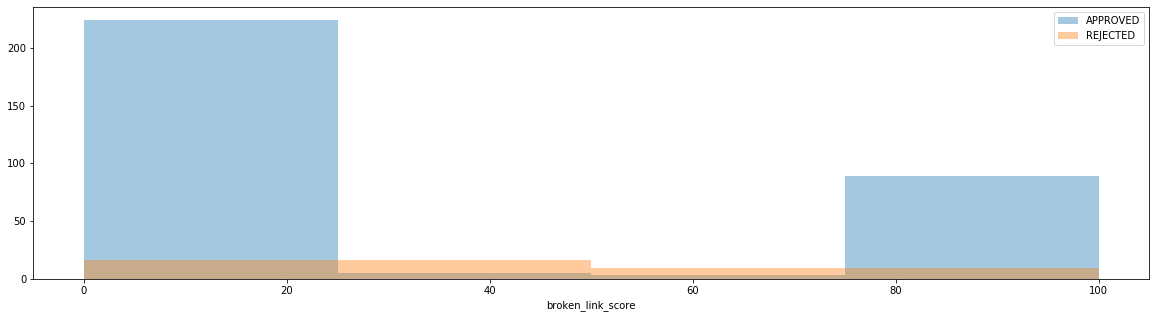

In [8]:
plt.figure(figsize=(20, 5))
sns.distplot(all_df[all_df.label == 'APPROVED']['broken_link_score'], kde=False, label='APPROVED')
sns.distplot(all_df[all_df.label == 'REJECTED']['broken_link_score'], kde=False, label='REJECTED')
plt.legend()
plt.show()

In [9]:
all_df[['broken_link_score', 'label']].groupby("label").describe()

broken_link_score                                                   
                     count       mean        std  min  25%  50%    75%    max
label                                                                        
APPROVED             321.0  29.764130  44.181058  0.0  0.0  0.0  100.0  100.0
REJECTED              25.0  37.733333  48.138689  0.0  0.0  0.0  100.0  100.0
REVIEWED             110.0  34.878788  46.772874  0.0  0.0  0.0  100.0  100.0

In [10]:
## Approved but scored 100 in broken links
anomaly_df = all_df[(all_df.label == 'APPROVED') & (all_df.broken_link_score == 100)]\
[['merchant_name','broken_link_score', 'label', 'website','broken_links']]

In [11]:
anomaly_df

,merchant_name,broken_link_score,label,website,broken_links
32,HuaningIndonesiaSukses,100.0,APPROVED,https://www.jomooz.com,{}
62,LUBRICANTS,100.0,APPROVED,http://payment.server-development.net,{'': 'None'}
70,BayyinahQuranIndonesia,100.0,APPROVED,bayyinah.id,{'': 'None'}
73,Aromanis,100.0,APPROVED,https://blanjamandiri.com,{'': 'None'}
74,CitraSuksesAbadi,100.0,APPROVED,https://blanjamandiri.com,{'': 'None'}
...,...,...,...,...,...
120,Glowy,100.0,APPROVED,https://www.glowi.id,{'': 'None'}
121,Valettashop,100.0,APPROVED,http://www.valettashop.com,{'': 'None'}
123,SportHelmetOnlineStore,100.0,APPROVED,https://sporthelmet.site/,{'': 'None'}
124,indovies.com,100.0,APPROVED,http://www.indovies.com,{'': 'None'}


In [12]:
def url_format_handler(url):
    """Return url with http/https prefix if not written"""

    if not url.startswith("http") and not url.startswith("https"):
        url = "http://" + url

    return url

In [21]:
import requests
df_response = pd.DataFrame({"website": [], "response": []})
websites = []
responses = []
for website in anomaly_df['website'].values:
    try:
        response = str(requests.get(url_format_handler(website), timeout=5))
        print(website + " " + response) 
    except Exception as e:
        response = str(e)
        print(website + " Error")
    websites.append(website)
    responses.append(response)

https://www.jomooz.com Error
http://payment.server-development.net Error
bayyinah.id <Response [200]>
https://blanjamandiri.com <Response [200]>
https://blanjamandiri.com <Response [200]>
http://mantap.com <Response [403]>
https://blanjamandiri.com <Response [200]>
https://blanjamandiri.com <Response [200]>
https://blanjamandiri.com <Response [200]>
https://www.worldshopdeluxe.com Error
https://ieltsregistration-staging.britishcouncil.org/test-chooser <Response [200]>
www.globomart.co Error
Https://hatapoda.id Error
Http://ngastadamel.com Error
Https://amayalin.com Error
zoyareseller.com <Response [200]>
https://jsw2019.fxsudirman.com Error
https://www.bmd-net.com/ Error
https://megadapur.com Error
https://www.osloflytte.com Error
http://www.anugrahalamindonesia.com Error
hennessydeclassified.id Error
https://www.jomooz.com <Response [523]>
https://dections.com Error
https://www.hotdealus.com/ Error
https://www.risingstockadvisor.com/ Error
Belisada.co.id Error
https://www.bmd-net.com/

In [22]:
df_response['website'] = websites
df_response['response'] = responses

In [41]:
## Total anomaly website
df_response.drop_duplicates().shape

(82, 2)

In [69]:
## Total SSL Error
ssl = df_response[(df_response.response.str.contains("SSL")) | (df_response.response.str.contains("ssl"))].drop_duplicates()
print(len(ssl))

16


In [70]:
## Total Unauthorized
unauthorized = df_response[df_response.response.str.contains("403")].drop_duplicates()
print(len(unauthorized))

2


In [71]:
## Total OK
ok = df_response[df_response.response.str.contains("200")].drop_duplicates()
print(len(ok))

13


In [72]:
## Total Dead
dead = df_response[df_response.response.str.contains("Failed to establish a new connection")].drop_duplicates()
print(len(dead))

41


In [74]:
## Total Timeout
timeout = df_response[df_response.response.str.contains("timed out")].drop_duplicates()
print(len(timeout))

8


In [77]:
ok['website'].values

array(['bayyinah.id', 'https://blanjamandiri.com',
       'https://ieltsregistration-staging.britishcouncil.org/test-chooser',
       'zoyareseller.com', 'https://www.instagram.com/armybaseina/',
       'http://www.loveclothing.top', 'https://cleopatrahotel.co.id',
       'http://ichveps.org/', 'https://www.manulife.co.id',
       'http://www.kattoen.id/',
       'http://www.letsgo4biggerworldbusiness.com',
       'http://www.minoroprecuts.com', 'http://www.valettashop.com'],
      dtype=object)

In [14]:
## Remove anomaly
processed_df = all_df[~all_df['website'].isin(anomaly_df['website'])]

In [15]:
processed_df.head()

,merchant_name,broken_link_score,link_contact_us_exist,cu_email_exist,cu_phone_number_exist,link_about_us_exist,link_tnc_exist,tnc_refund_policy_exist,contact_us_score,tnc_score,broken_links,website,label
0,CV.ASIATRIPINDONESIA,0.0,1.0,1.0,1.0,0.0,1.0,1.0,100.0,100.0,{},http://asiatrip.id/,APPROVED
1,Pt.BloomingLotusYoga,0.0,1.0,1.0,1.0,1.0,1.0,0.0,100.0,0.0,{},https://www.blooming-lotus-yoga.com,APPROVED
2,YayasanGreenSejahtera,0.0,1.0,1.0,1.0,1.0,1.0,1.0,100.0,100.0,{},https://greensejahterafoundation.com/,APPROVED
3,PTMatairTerraSolusi,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,{},http://www.matair.co.id,APPROVED
4,SimplyMii,0.0,1.0,0.0,1.0,0.0,0.0,0.0,50.0,0.0,{},https://www.simplymii.com/,APPROVED


In [16]:
processed_df[['broken_link_score', 'label']].groupby("label").describe()

broken_link_score                                                   
                     count       mean        std  min  25%  50%    75%    max
label                                                                        
APPROVED             233.0   3.237278  10.700115  0.0  0.0  0.0    0.0   90.0
REJECTED              25.0  37.733333  48.138689  0.0  0.0  0.0  100.0  100.0
REVIEWED             110.0  34.878788  46.772874  0.0  0.0  0.0  100.0  100.0

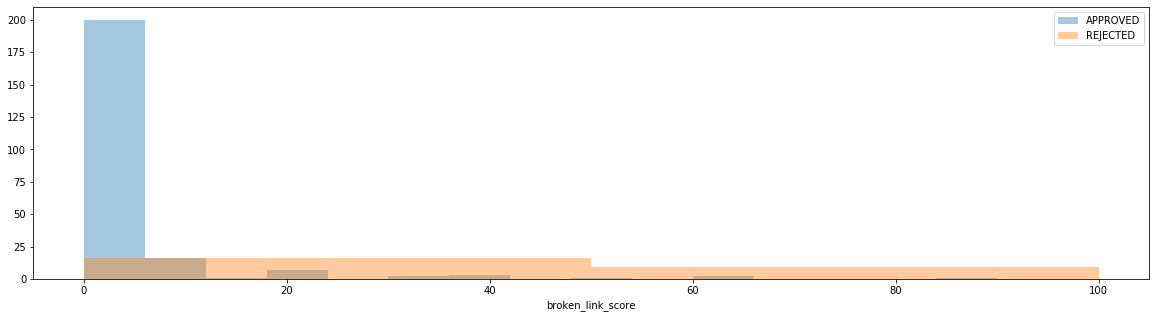

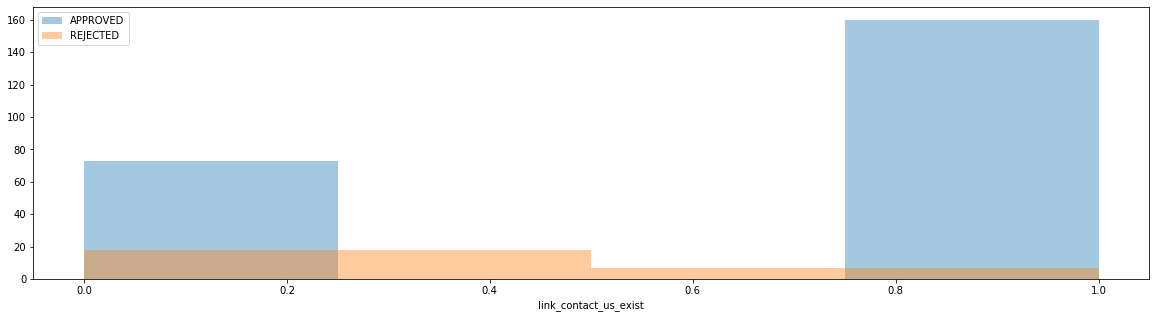

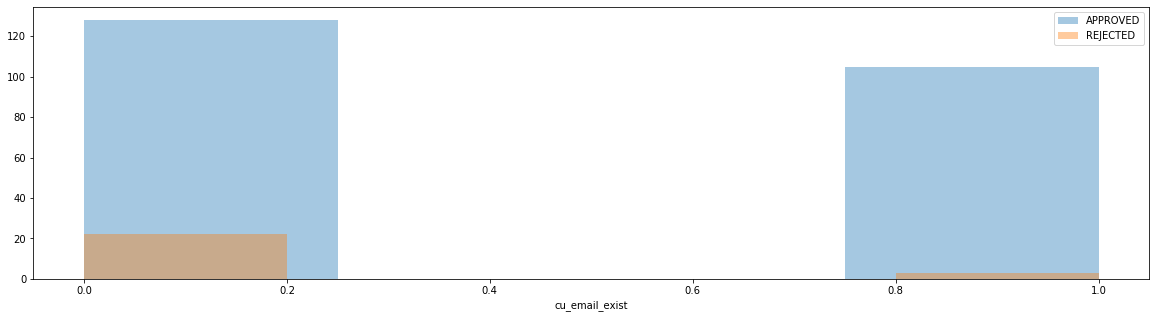

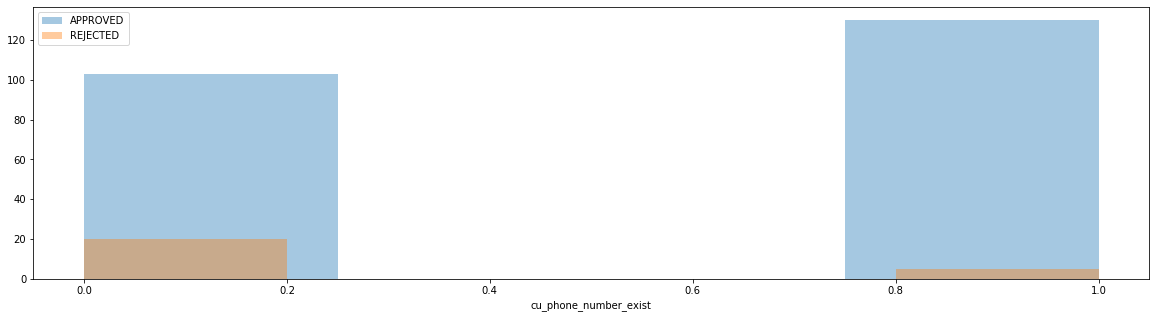

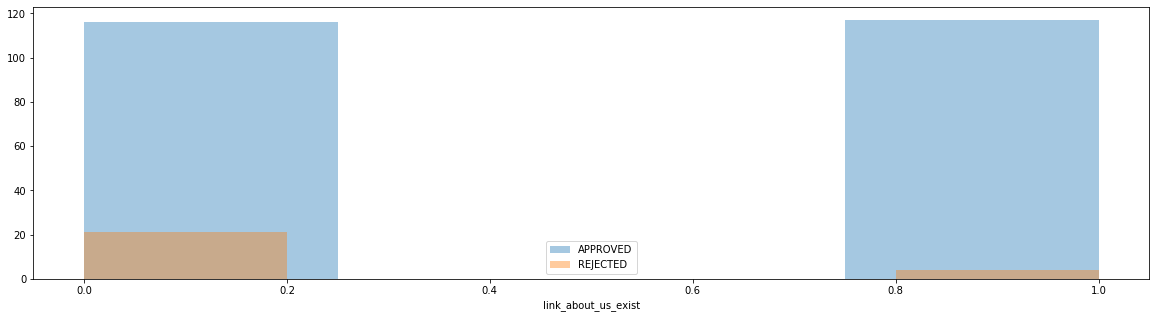

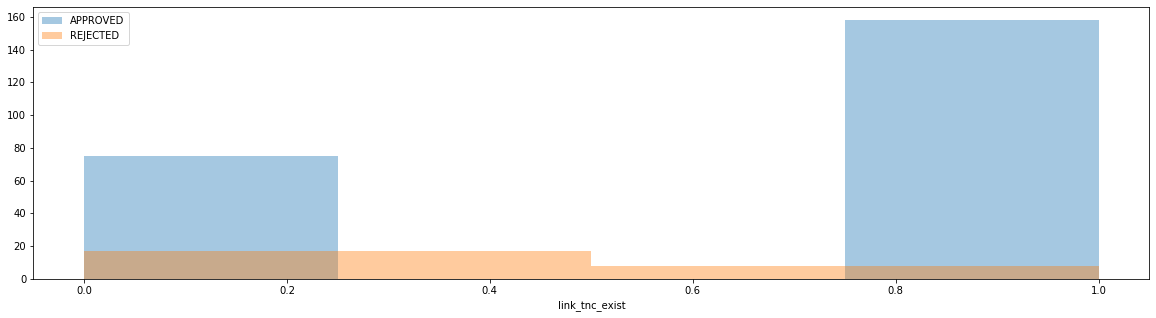

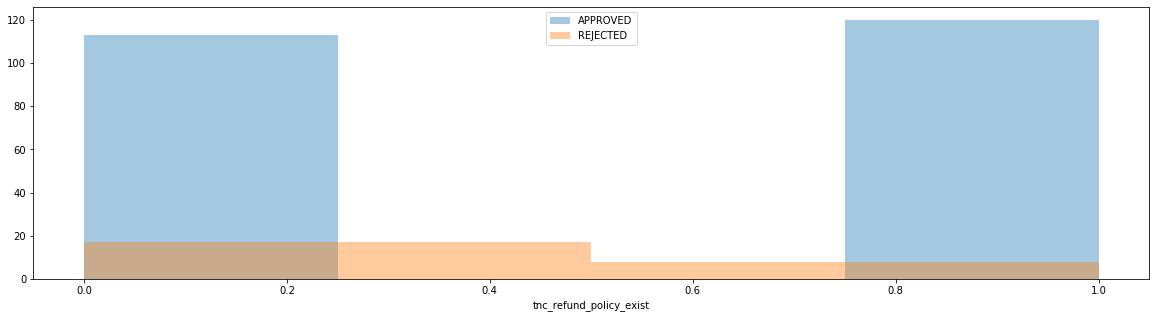

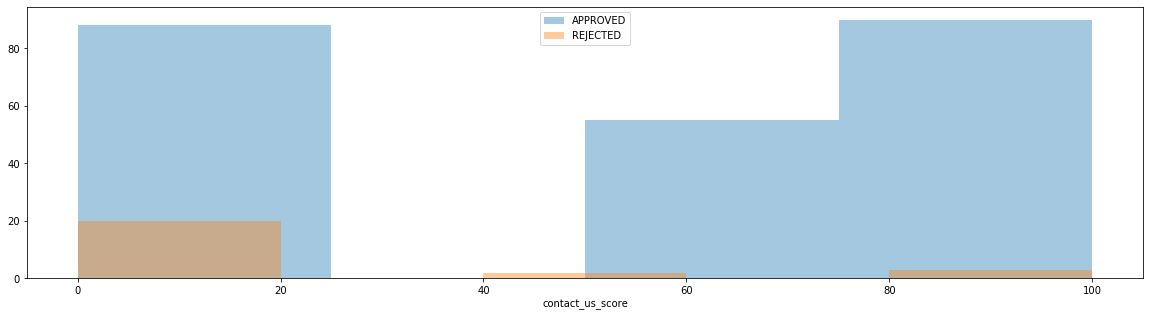

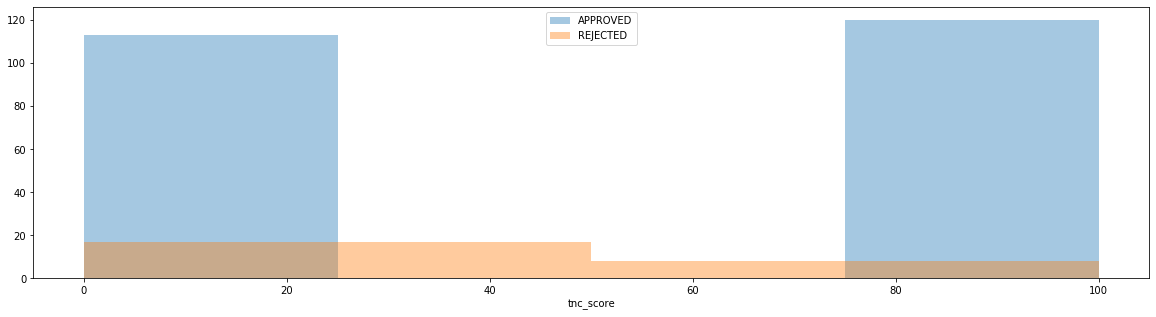

In [17]:
for column in processed_df.columns.values:
    if column == 'website' or column == 'broken_links' or column == 'merchant_name' or column == 'label':
        continue
    plt.figure(figsize=(20, 5))
    sns.distplot(processed_df[processed_df.label == 'APPROVED'][column], label='APPROVED', kde=False)
    sns.distplot(processed_df[processed_df.label == 'REJECTED'][column], label='REJECTED', kde=False)
    plt.legend()
    plt.show()

In [18]:
processed_df[(processed_df['tnc_score'] == 0) & (processed_df['label'] == 'APPROVED')]

,merchant_name,broken_link_score,link_contact_us_exist,cu_email_exist,cu_phone_number_exist,link_about_us_exist,link_tnc_exist,tnc_refund_policy_exist,contact_us_score,tnc_score,broken_links,website,label
1,Pt.BloomingLotusYoga,0.0,1.0,1.0,1.0,1.0,1.0,0.0,100.0,0.0,{},https://www.blooming-lotus-yoga.com,APPROVED
3,PTMatairTerraSolusi,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,{},http://www.matair.co.id,APPROVED
4,SimplyMii,0.0,1.0,0.0,1.0,0.0,0.0,0.0,50.0,0.0,{},https://www.simplymii.com/,APPROVED
9,Fipper,0.0,1.0,1.0,1.0,1.0,1.0,0.0,100.0,0.0,{},http://www.fippersandal.co.id,APPROVED
22,AOGIN,0.0,1.0,1.0,1.0,0.0,0.0,0.0,100.0,0.0,{},aoginbali2020.com,APPROVED
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,TheCurvakum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,{},http://www.thecurvakumlabel.com/,APPROVED
108,buy-saber,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,{},https://buy-saber.com/,APPROVED
110,ALKHANSAS,20.0,0.0,1.0,0.0,1.0,0.0,0.0,50.0,0.0,"{'http://<span id=""cart"" class=""cart""><a href=...",https://store.alkhansas.com/,APPROVED
113,PT.TirtaKumalaSari,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,{},https://pureheals.co.id,APPROVED
